# 队

## 循环队列

In [32]:
class SeqQueue:
    def __init__(self, max_size=10):
        self.max_size = max_size + 1 # 实际多放一个空间，区分对空、队满
        self.front = 0
        self.rear = 0
        self.elements = [None]*max_size

    def enqueue(self, element) -> bool:
        if (self.rear + 1) % self.max_size == self.front:
            print('Queue is Full!')
            return False
        else:
            self.elements[self.rear] = element
            self.rear = (self.rear + 1) % self.max_size
            return True

    def dequeue(self):
        if self.front == self.rear:
            print('Queue is Empty!')
            return None
        else:
            e = self.elements[self.front]
            self.front = (self.front + 1) % self.max_size
            return e


In [35]:
q = SeqQueue(10)
for i in range(10):
    q.enqueue(i)

for i in range(10):
    print(q.dequeue(), end=',')

0,1,2,3,4,5,6,7,8,9,

## 基于队列求解迷宫问题

In [2]:
class QueueNode:
    def __init__(self, element, next=None):
        self.element = element
        self.next = next

class Queue:
    def __init__(self):
        self.front = QueueNode('Head')
        self.rear = self.front

    def enqueue(self, e):
        self.rear.next = QueueNode(e)
        self.rear = self.rear.next

    def empty(self):
        return self.front == self.rear

    def dequeue(self):
        if self.empty():
            return None
        else:
            e = self.front.next.element
            self.front.next = self.front.next.next
            if self.front.next == None:
                self.rear = self.front
            return e

class MazeCell:
    def __init__(self, x, y, wall = False, visited = False, from_cell = None):
        self.x = x
        self.y = y
        self.wall = wall
        self.visited = visited
        self.from_cell = from_cell

    def __repr__(self):
        value = 1 if self.wall else 0
        return f'({self.x}, {self.y}, {value})'

maze_array = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]

maze = [ [MazeCell(x, y, value==1) for y, value in enumerate(row)] for x, row in enumerate(maze_array) ]
start = maze[1][1]
out = maze[8][8]

q = Queue()
q.enqueue(start)


while not q.empty() and not out.visited:
    # 如果是出口，则结束循环
    current:MazeCell = q.dequeue()
    current.visited = True
    if current == out:
        break

    # 把上下左右四个位置，非墙的情况，放入队列进行探索
    x, y = current.x, current.y
    if(not maze[x][y-1].wall and not maze[x][y-1].visited):
        maze[x][y-1].from_cell = current
        q.enqueue(maze[x][y-1])
        
    if(not maze[x+1][y].wall and not maze[x+1][y].visited):
        maze[x+1][y].from_cell  = current
        q.enqueue(maze[x+1][y])

    if(not maze[x][y+1].wall and not maze[x][y+1].visited):
        maze[x][y+1].from_cell  = current
        q.enqueue(maze[x][y+1])

    if(not maze[x-1][y].wall and not maze[x-1][y].visited):
        maze[x-1][y].from_cell  = current
        q.enqueue(maze[x-1][y])

path = []
p = out
while p != None:
    path.append(p)
    p = p.from_cell
path = path[::-1]
#locations.reverse()
print(path)

[(1, 1, 0), (2, 1, 0), (3, 1, 0), (4, 1, 0), (5, 1, 0), (6, 1, 0), (6, 2, 0), (6, 3, 0), (6, 4, 0), (6, 5, 0), (6, 6, 0), (7, 6, 0), (7, 7, 0), (7, 8, 0), (8, 8, 0)]


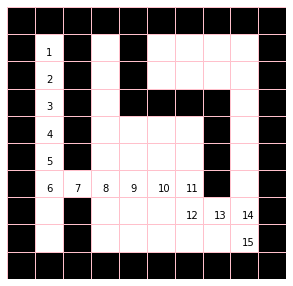

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
fig.set_size_inches(5,5) # 设置每个大小实际占据的尺寸
plt.xlim([0, 10])
plt.ylim([0, 10])
ax.axis('off')

def draw_cell(x, y, wall = False):
    fc = 'black' if wall else 'white'
    ax.add_patch(Rectangle((y, 9-x), 1, 1,
            edgecolor = 'pink',
            facecolor = fc))

def draw_visited(x, y, step):
    ax.text(y+0.4, 9-x+0.2, str(step))

# 绘制迷宫
for row in maze:
   for cell in row:
       draw_cell(cell.x, cell.y, cell.wall)

# 标记找到的路径
for idx, cell in enumerate(path):
    draw_visited(cell.x, cell.y, idx+1)       

plt.show()        
